In [1]:
import pandas as pd
from tqdm import tqdm
from geopy.geocoders import Here

In [46]:
df = pd.read_pickle('bus_delays.pickle')

In [7]:
here = Here(apikey='gOC6l9Nx4nDSvHcjzMfGaVvagDwxmO5BsQTrBL7IoBA')

In [8]:
locations = {}

In [9]:
seen = set(locations.keys())

In [17]:
for k,v in tqdm(df.iterrows(),total=len(df)):
    if v.Station == v.Station:
        query = f'{v.Station}, Toronto, Canada'.lower()
        if query not in seen:
            location = here.geocode(query)
            locations[v.Station.lower()] = location
            seen.add(query)

100%|██████████| 141752/141752 [01:27<00:00, 1628.20it/s]


In [19]:
import pickle
with open('location_map.pickle','wb') as f:
    pickle.dump(locations,f)

In [48]:
df['geometry'] = None

In [49]:
df = df[~df.Location.isna()]
for k,v in df.iterrows():
    if isinstance(v.Location,tuple):
        continue
    if locations[v.Location.lower()] is None:
        continue
    df.at[k,'geometry'] = locations[v.Location.lower()][1]

In [50]:
import geopandas as gpd

In [51]:
gdf = gpd.GeoDataFrame(df)

AttributeError: 'Series' object has no attribute 'crs'

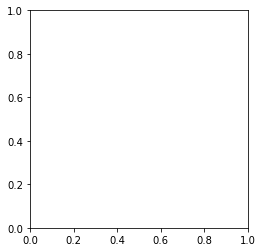

In [52]:
gdf.plot()

In [53]:
gdf

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Delay,Gap,geometry
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0,NaN,NaN,"(43.70112, -79.51613)"
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0,NaN,NaN,"(43.6487, -79.38545)"
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0,NaN,NaN,"(43.74539, -79.29476)"
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0,NaN,NaN,"(43.71577, -79.56865)"
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0,NaN,NaN,"(43.79233, -79.16427)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54924,2015-01-31,24,22:35:00,Saturday,MCNICOLL AND VICTORIA PARK,Mechanical,10.0,20.0,SB,7714.0,NaN,NaN,"(43.80407, -79.33633)"
54925,2015-01-31,22,22:43:00,Saturday,SCARBORO AND KINGSTON,Mechanical,15.0,30.0,SB,7838.0,NaN,NaN,"(43.73675, -79.21947)"
54926,2015-01-31,29,22:48:00,Saturday,Queen & Dufferin,Mechanical,8.0,16.0,NB,8355.0,NaN,NaN,"(43.64223, -79.42861)"
54927,2015-01-31,106,23:35:00,Saturday,Downsview STN,Mechanical,12.0,24.0,NB,8169.0,NaN,NaN,"(43.72892, -79.49136)"
